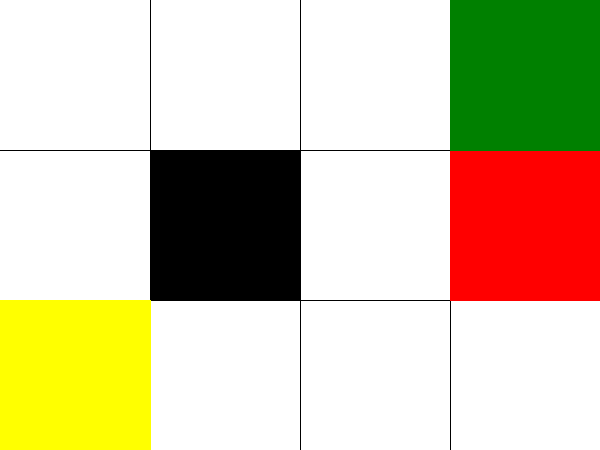

In [1]:
from grid_world import *
from qlearn import *
from sarsa import *
from run_algo import *
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Parameters we will use to create the Grid World (we can make more complex worlds!!)
BOARD_ROWS = 3
BOARD_COLS = 4
WIN_STATE = (0, 3)
LOSE_STATE = [(1, 3)]
OBSTACLES = [(1,1)]
START = (2, 0)
MAX_STEPS = 100

# Create the environment
env = GridWorld(BOARD_ROWS, BOARD_COLS, 
                WIN_STATE, LOSE_STATE, 
                OBSTACLES, START, 
                MAX_STEPS)

# Number of 'matches' to simulate
N_EPISODES = 500

# Exploration
MAX_EPSILON = 0.75
MIN_EPSILON = 0

# Let's take a look at the Grid Wold
env.render()

ALPHA = 0.1, GAMMA = 0.1:


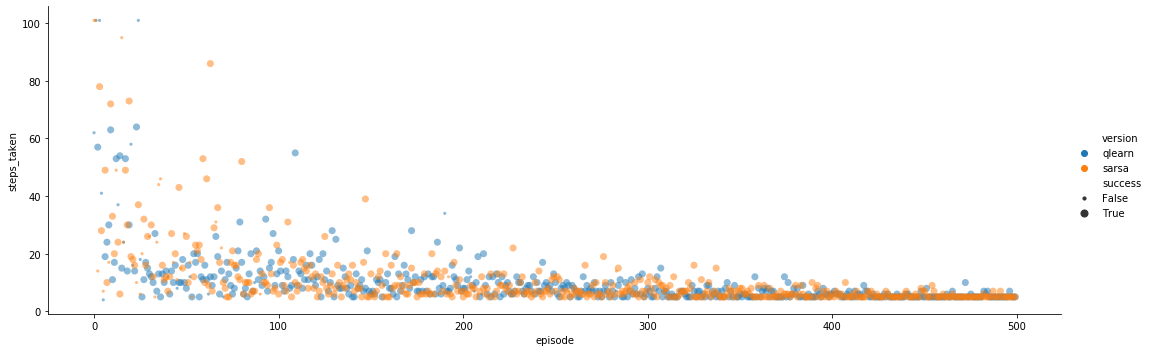

ALPHA = 0.1, GAMMA = 0.3:


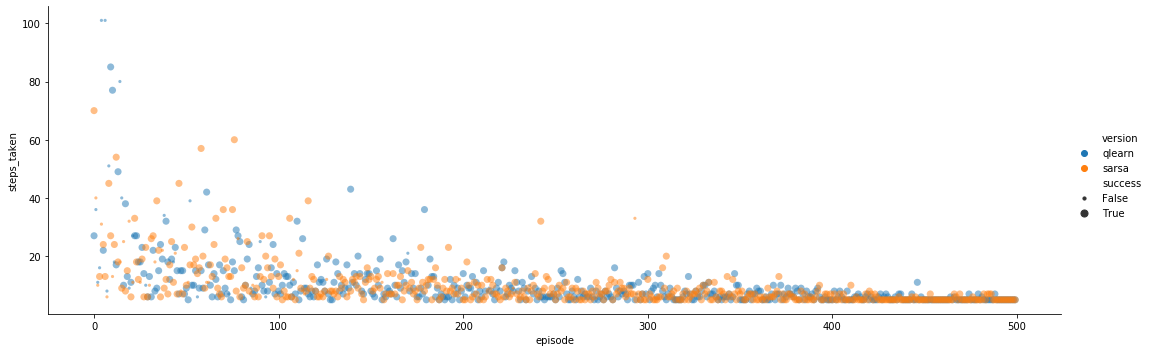

ALPHA = 0.1, GAMMA = 0.5:


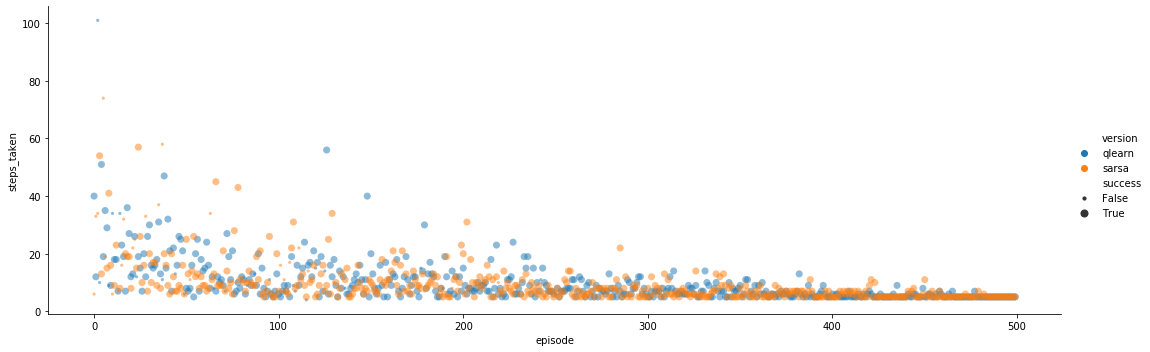

ALPHA = 0.1, GAMMA = 0.7:


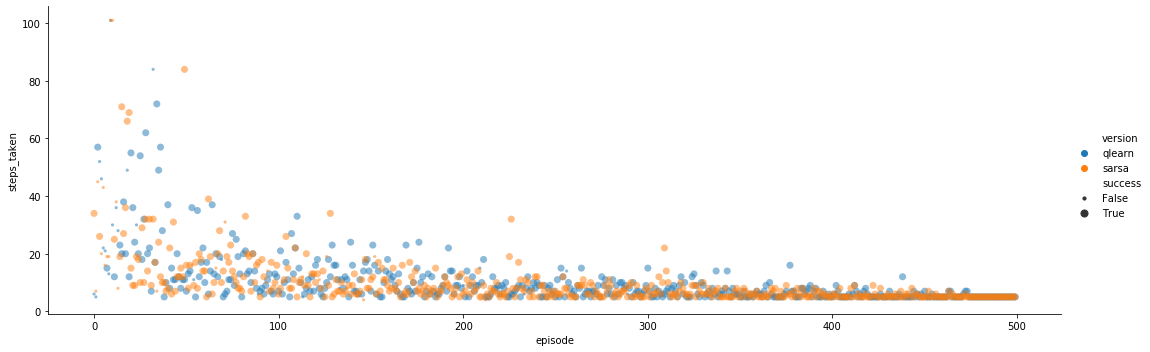

ALPHA = 0.1, GAMMA = 0.9:


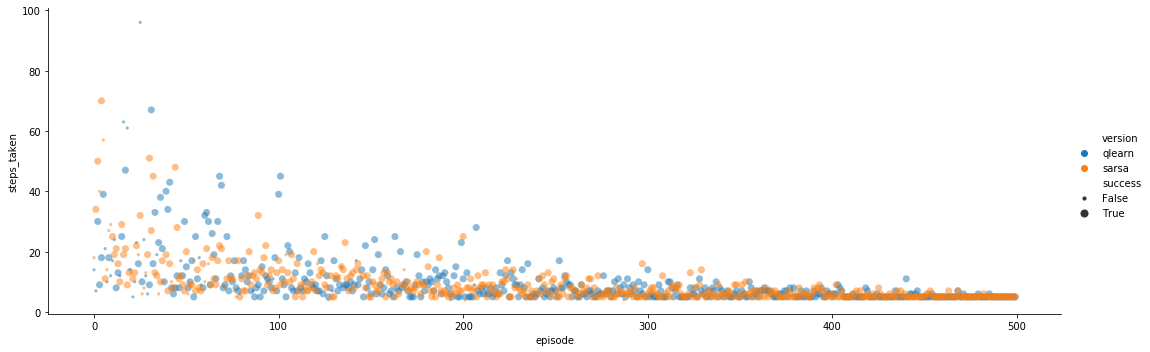

ALPHA = 0.3, GAMMA = 0.1:


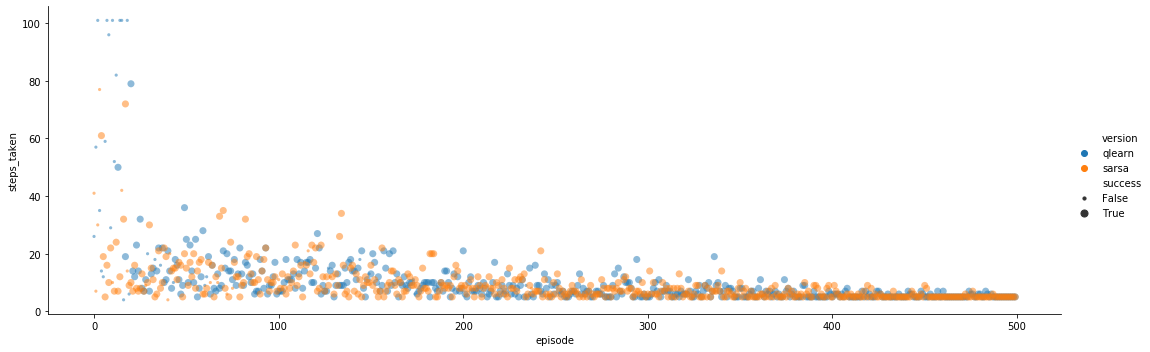

ALPHA = 0.3, GAMMA = 0.3:


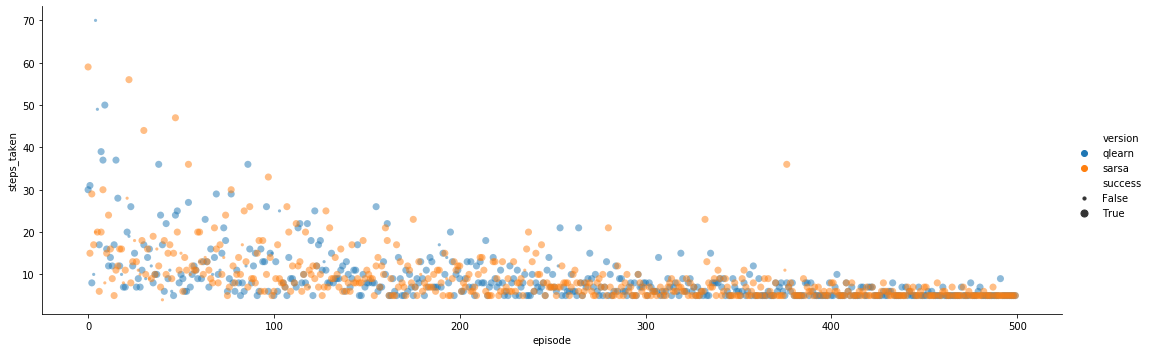

ALPHA = 0.3, GAMMA = 0.5:


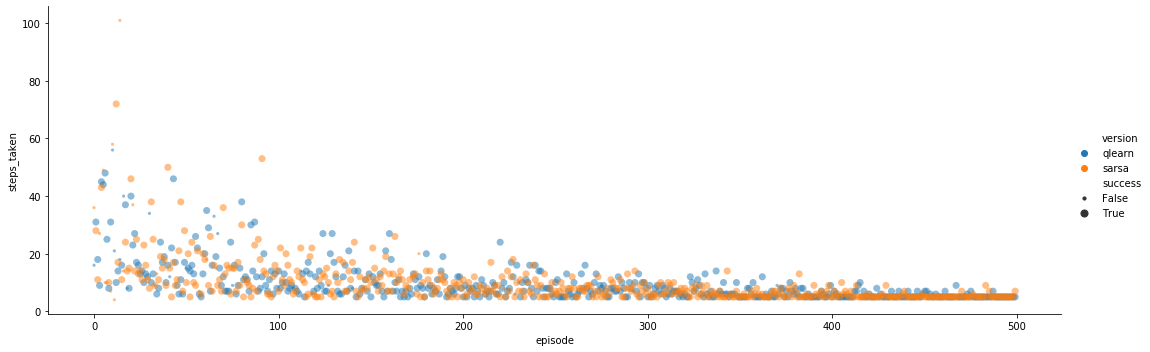

ALPHA = 0.3, GAMMA = 0.7:


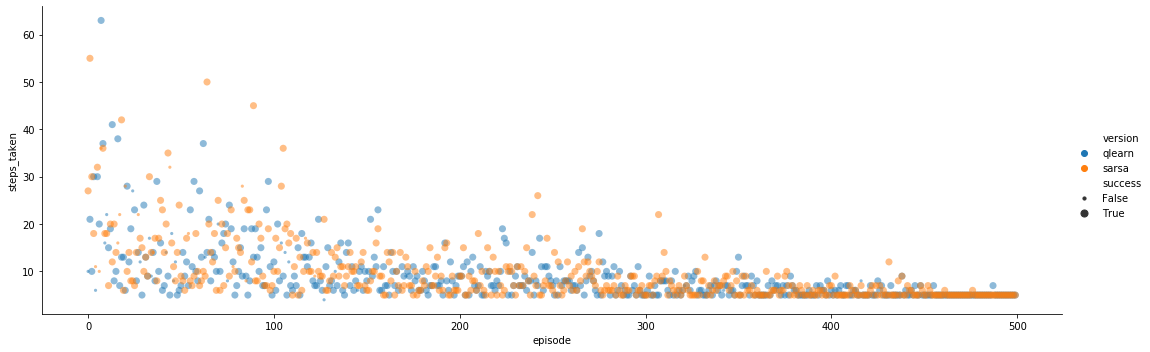

ALPHA = 0.3, GAMMA = 0.9:


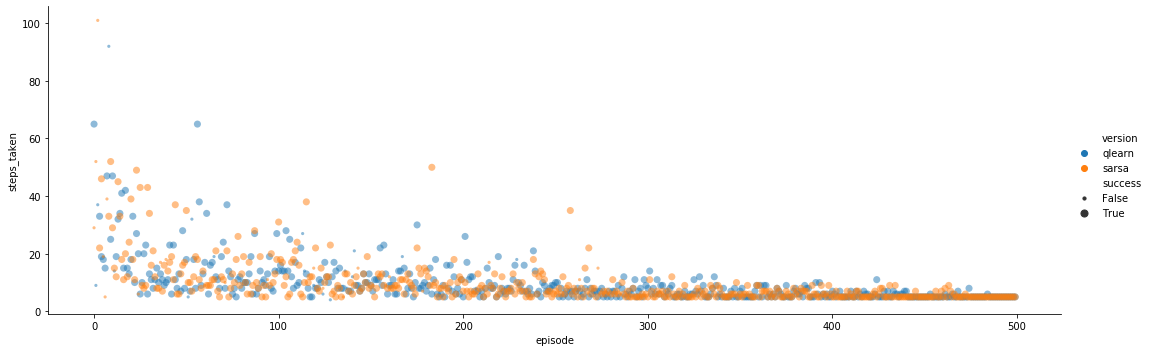

ALPHA = 0.5, GAMMA = 0.1:


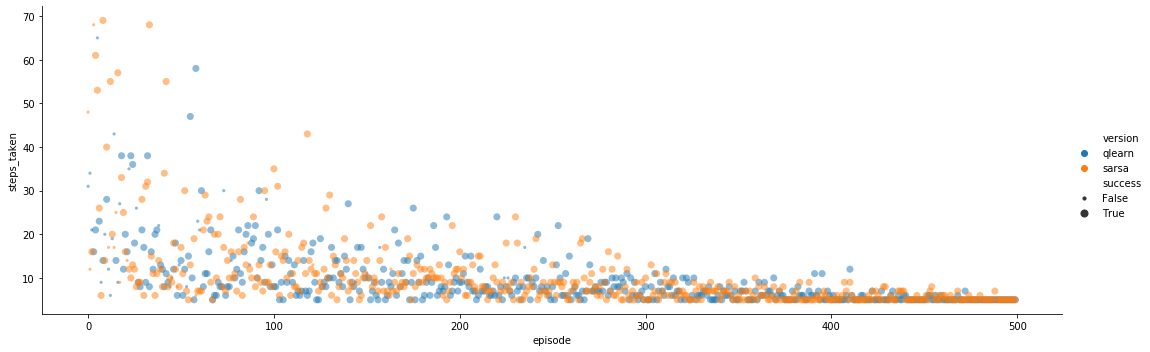

ALPHA = 0.5, GAMMA = 0.3:


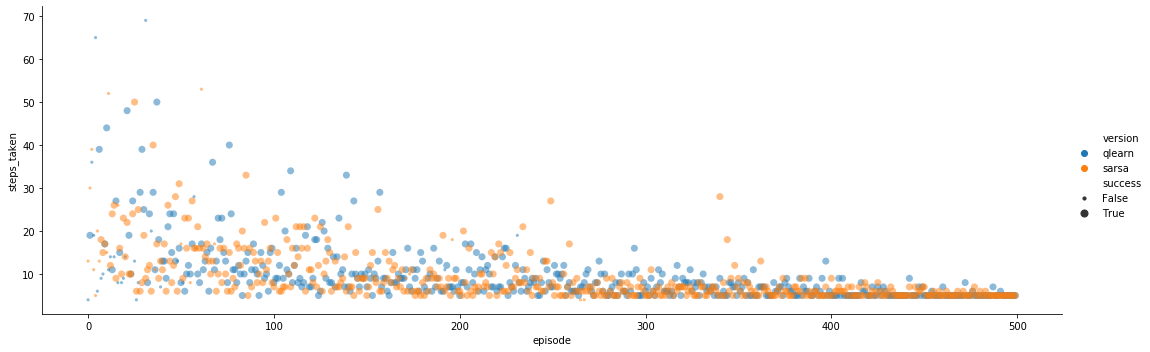

ALPHA = 0.5, GAMMA = 0.5:


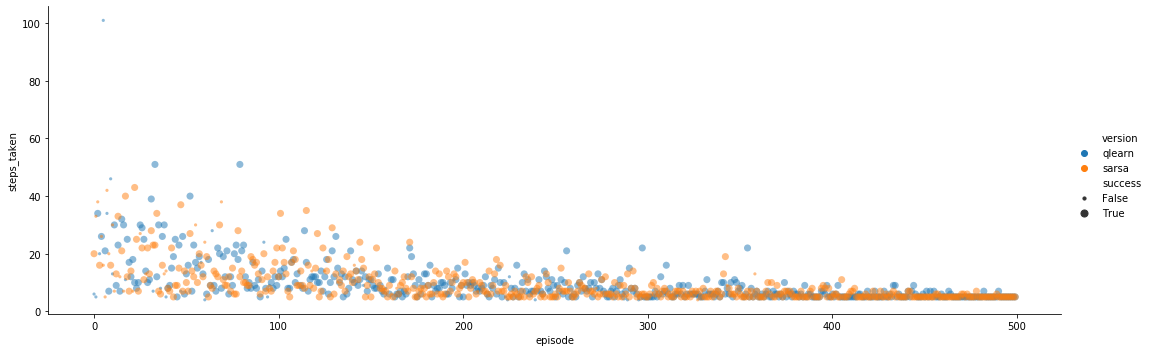

ALPHA = 0.5, GAMMA = 0.7:


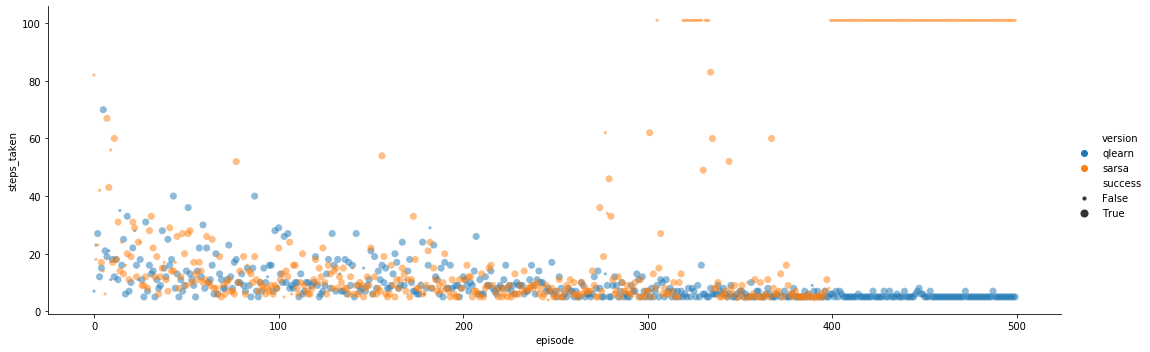

ALPHA = 0.5, GAMMA = 0.9:


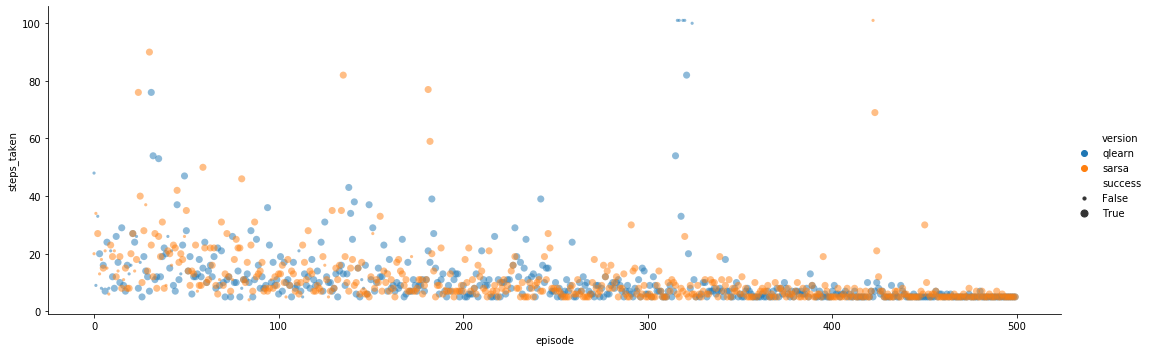

ALPHA = 0.7, GAMMA = 0.1:


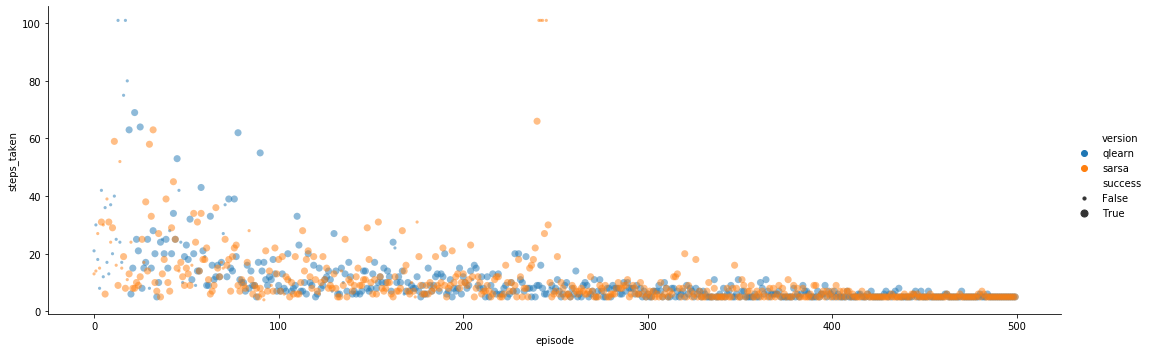

ALPHA = 0.7, GAMMA = 0.3:


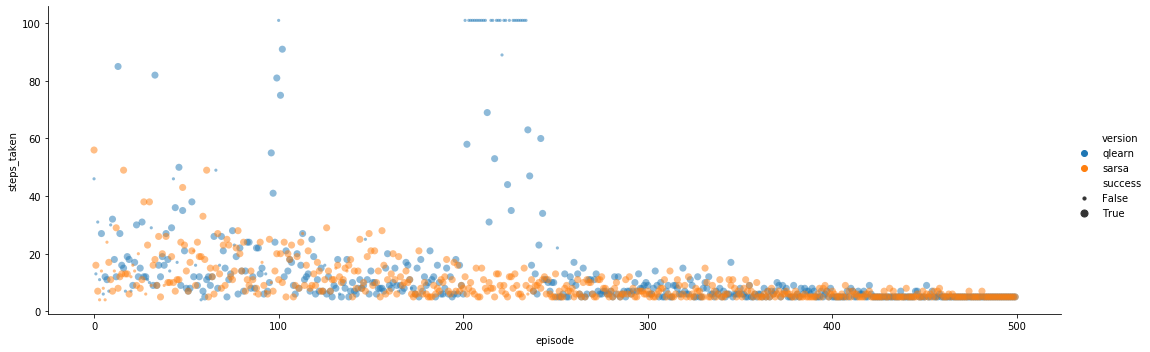

ALPHA = 0.7, GAMMA = 0.5:


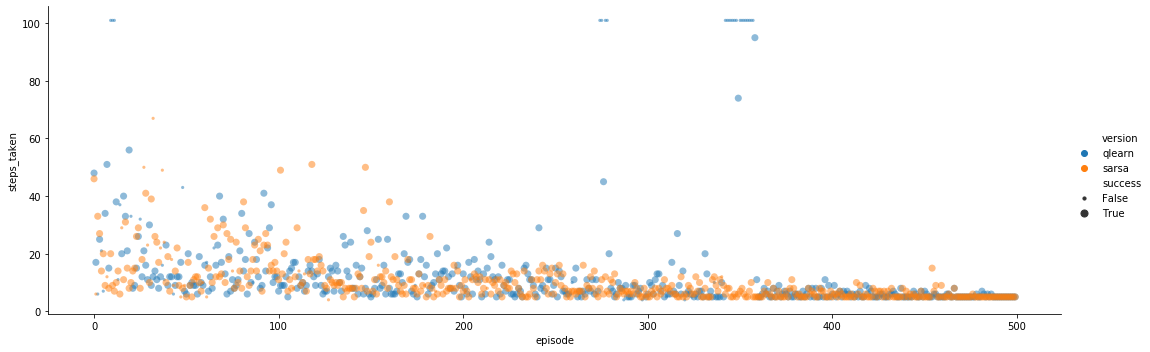

ALPHA = 0.7, GAMMA = 0.7:


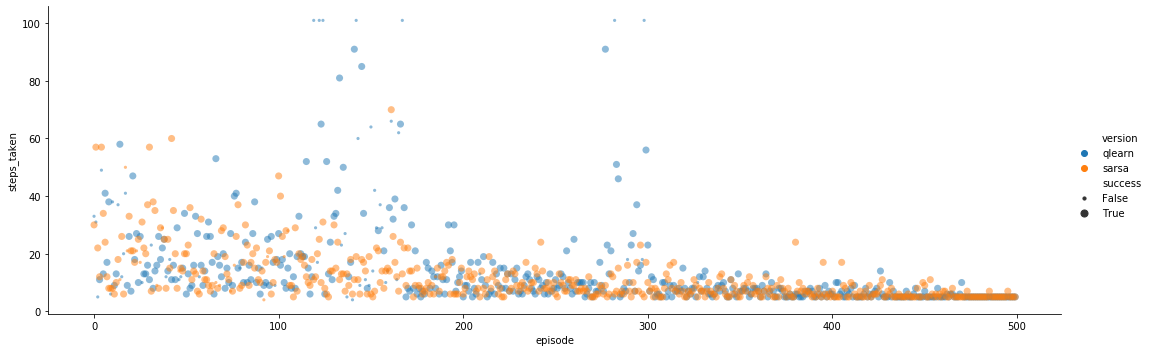

ALPHA = 0.7, GAMMA = 0.9:


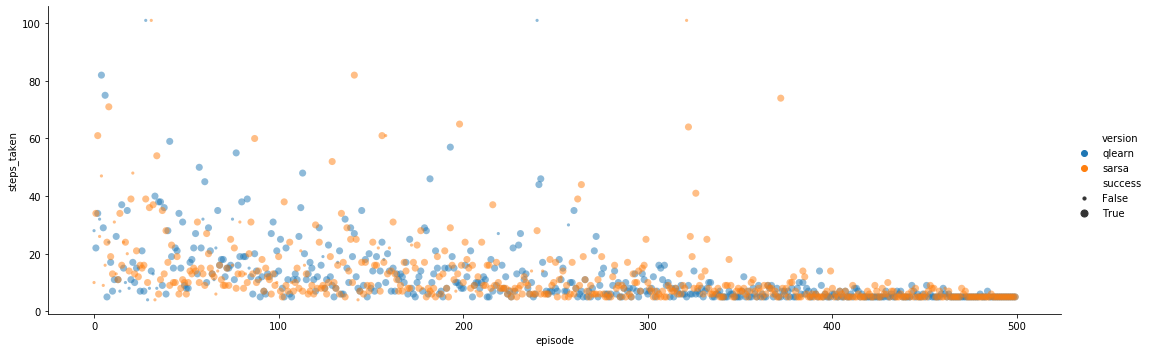

ALPHA = 0.9, GAMMA = 0.1:


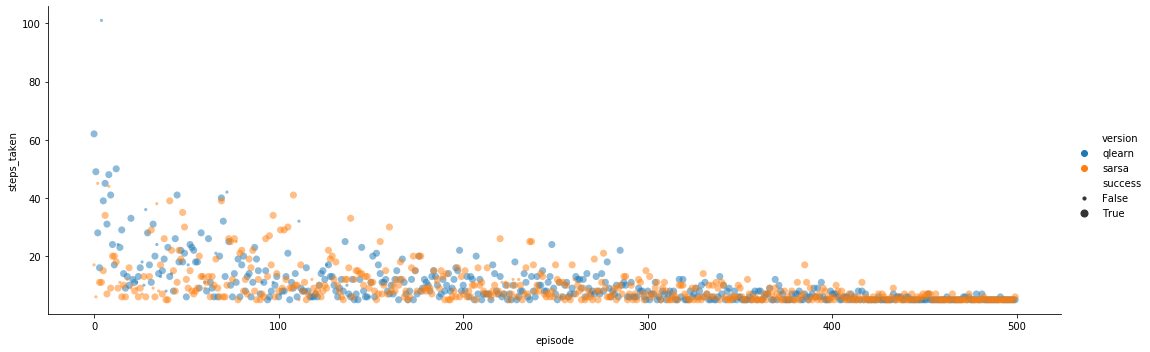

ALPHA = 0.9, GAMMA = 0.3:


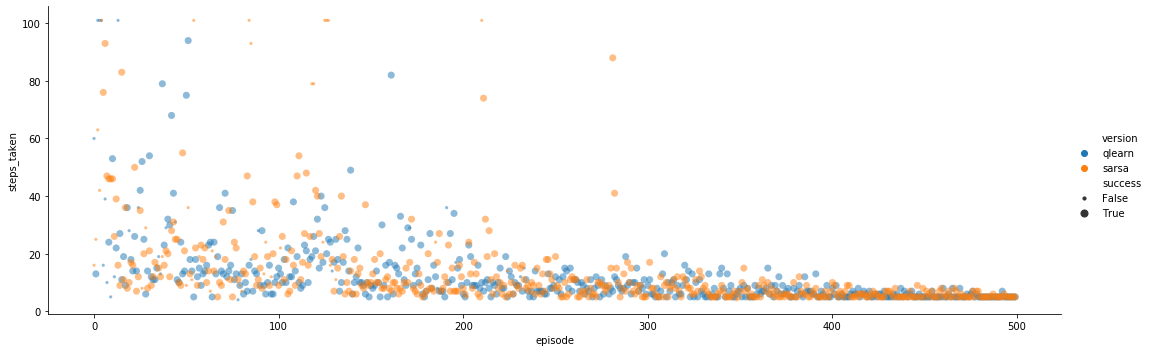

ALPHA = 0.9, GAMMA = 0.5:


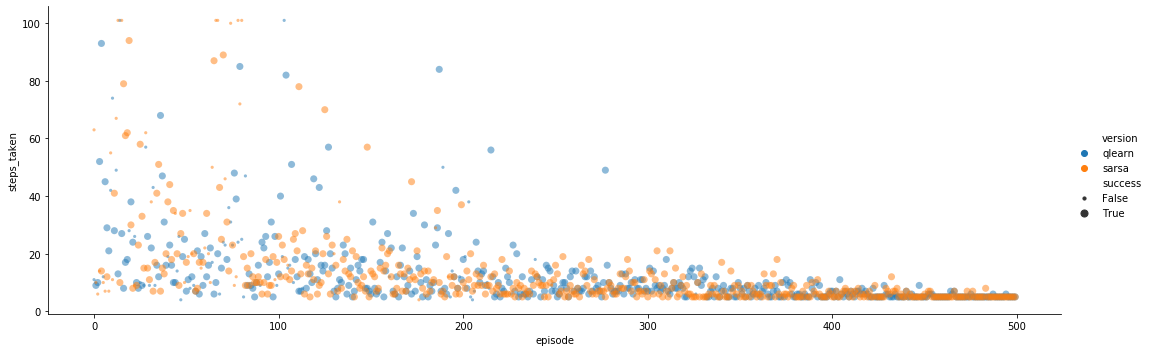

ALPHA = 0.9, GAMMA = 0.7:


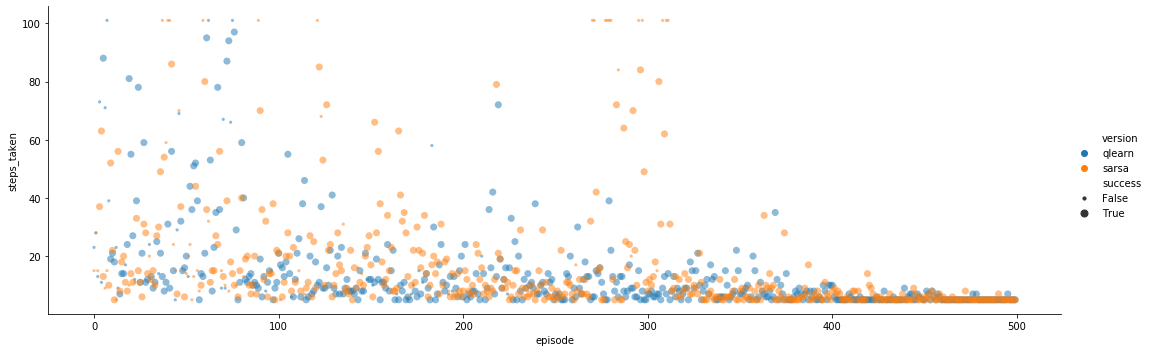

ALPHA = 0.9, GAMMA = 0.9:


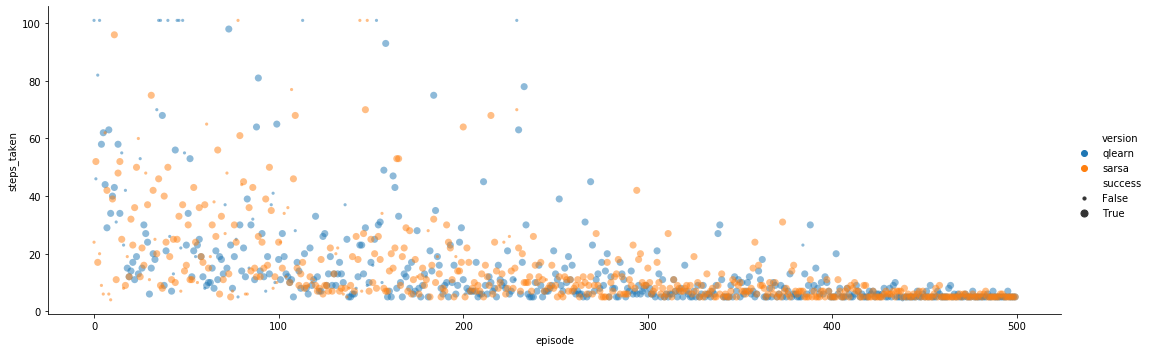

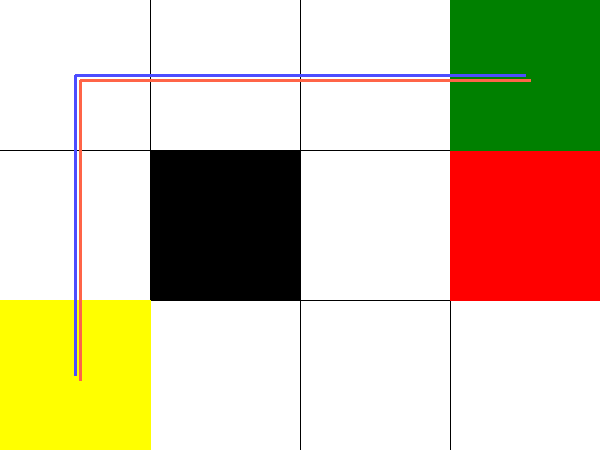

In [2]:


for alpha in [x/10. for x in range(1,10,2)]:
    for gamma in [x/10. for x in range(1,10,2)]:        
        # Instances of the learning models
        # See sarsa.py and qlearn.py
        qlearn = SARSA(alpha, gamma, env.action_space, MAX_EPSILON, MIN_EPSILON, N_EPISODES)
        sarsa = SARSA(alpha, gamma, env.action_space, MAX_EPSILON, MIN_EPSILON, N_EPISODES)

        # Instance of the utility class that runs the algorithms
        runner = Runner(env, qlearn)
        qlearn_steps_taken, qlearn_success, qlearn_paths = runner.run(N_EPISODES)
        runner = Runner(env, sarsa)
        sarsa_steps_taken, sarsa_success, sarsa_paths = runner.run(N_EPISODES)
        
        print(f"ALPHA = {alpha}, GAMMA = {gamma}:")        
        # Make plot on the evolution of the algorithms
        dict = {    'episode': list(range(N_EPISODES))*2,
            'version': ['qlearn']*N_EPISODES + ['sarsa']*N_EPISODES,
            'steps_taken': qlearn_steps_taken + sarsa_steps_taken, 
            'success': qlearn_success + sarsa_success
            }
        data = pd.DataFrame(dict)


        plot = sns.relplot(x='episode', data=data, y='steps_taken', hue='version', kind="scatter", size='success', sizes=[10,50], aspect=3, alpha=0.5, edgecolor='none')
        plt.show()
env.render([qlearn_paths, sarsa_paths])
        

### Now let's try a more complex environment

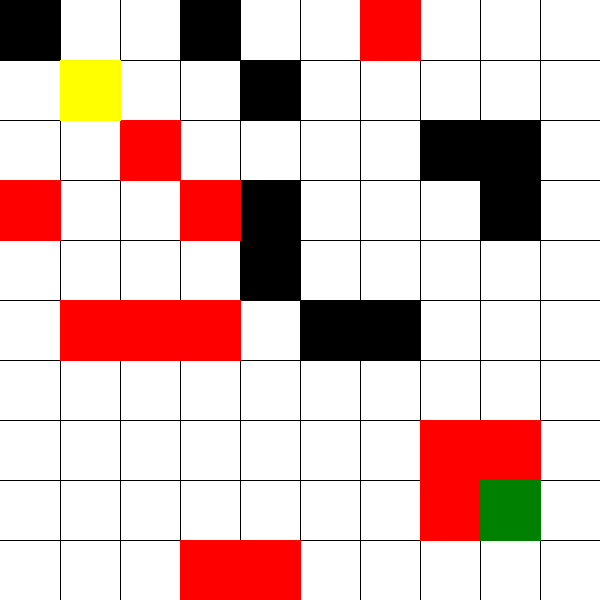

In [3]:
BOARD_ROWS = 10 # Bigger map (roughly 10 times bigger)
BOARD_COLS = 10
START = (1, 1) # We start in the upper left corner of the board
WIN_STATE = (BOARD_ROWS - 2, BOARD_COLS - 2) # And our goal is to go across the board
# Two lose states next to the win state
LOSE_STATE = [(WIN_STATE[0] - 1, WIN_STATE[1] - 1), (WIN_STATE[0] - 1, WIN_STATE[1])] 
# Make more lose states (and leave two of them next to the winning state)
for i in range(10):
    x = 1
    y = 1
    while (x,y) == START or \
          (x,y) == WIN_STATE or\
          (x,y) in LOSE_STATE:
          x = random.randint(0,BOARD_ROWS - 1)
          y = random.randint(0,BOARD_COLS - 1)
    LOSE_STATE.append((x,y))
# Let's make some random obstacles
OBSTACLES = [(10,10), (13,12), (50,50)]   # Make more obstacles
for i in range(10):
    x = 1
    y = 1
    while (x,y) == START or \
          (x,y) == WIN_STATE or \
          (x,y) in LOSE_STATE or \
          (x,y) in OBSTACLES:
          x = random.randint(0,BOARD_ROWS - 1)
          y = random.randint(0,BOARD_COLS - 1)
    OBSTACLES.append((x,y))

# Define a max of moves in each episode so that
# the first episodes don't last forever
MAX_STEPS = 5000
# Create the environment
env = GridWorld(BOARD_ROWS, BOARD_COLS, 
                WIN_STATE, LOSE_STATE, 
                OBSTACLES, START,
                MAX_STEPS)

# Let's take a look at the Grid Wold
env.render()

Caminhos percorridos pelos algoritmos nos últimos 5 episódios:


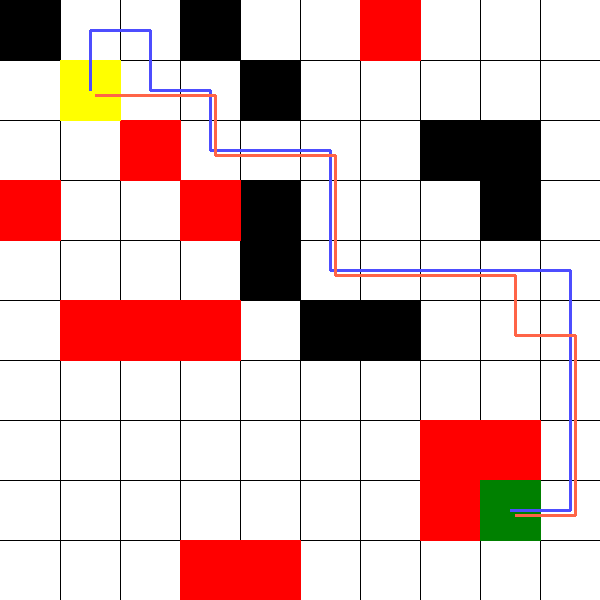

In [4]:
# We gonna need more iterations to converge in a more complex environment
N_EPISODES = 20000

# Learning model parameters
# From the previous tests i figured out
# these would be good values in this context
ALPHA = 0.1
GAMMA = 0.9

qlearn = SARSA(ALPHA, GAMMA, env.action_space, MAX_EPSILON, MIN_EPSILON, N_EPISODES)
runner = Runner(env, qlearn)
qlearn_steps_taken, qlearn_success, qlearn_paths = runner.run(N_EPISODES)

sarsa = SARSA(ALPHA, GAMMA, env.action_space, MAX_EPSILON, MIN_EPSILON, N_EPISODES)
runner = Runner(env, sarsa)
sarsa_steps_taken, sarsa_success, sarsa_paths = runner.run(N_EPISODES)
print("Caminhos percorridos pelos algoritmos nos últimos 5 episódios:")
env.render([qlearn_paths, sarsa_paths])

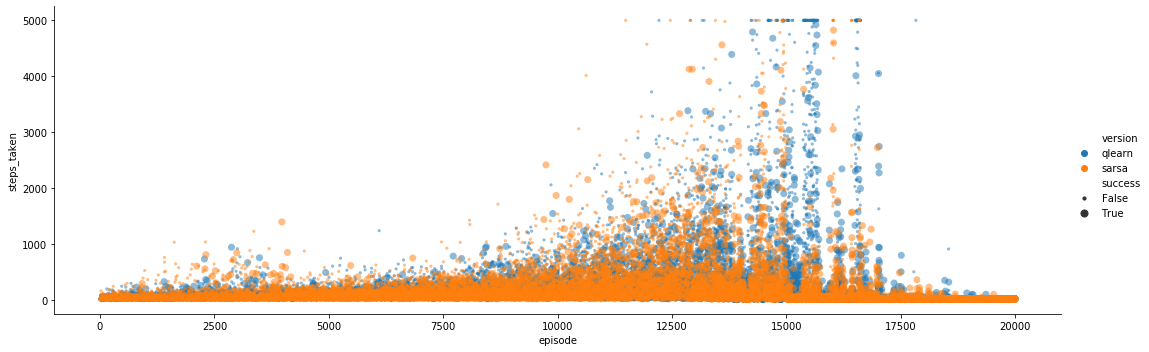

In [5]:
dict = {    'episode': list(range(N_EPISODES))*2,
            'version': ['qlearn']*N_EPISODES + ['sarsa']*N_EPISODES,
            'steps_taken': qlearn_steps_taken + sarsa_steps_taken, 
            'success': qlearn_success + sarsa_success
            }
data = pd.DataFrame(dict)


plot = sns.relplot(x='episode', data=data, y='steps_taken', hue='version', kind="scatter", size='success', sizes=[10,50], aspect=3, alpha=0.5, edgecolor='none')
plt.show()